## Install Libraries

In [1]:
# Install all the libraries needed if u didnt have in ur environment
# If u have alr, then no need to install it :D
%pip install nltk
%pip install geopy
%pip install contextily
%pip install geopandas
%pip install folium
%pip install flask

# Import nltk first to download all the things that we needed for pre-processing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Import all the libraries that are needed for this code
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from geopy.distance import geodesic
from sklearn.preprocessing import LabelEncoder

You should consider upgrading via the '/Users/wilbertcoandsss/Documents/WB23-1/Virtual Environments/deep_learning/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/wilbertcoandsss/Documents/WB23-1/Virtual Environments/deep_learning/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/wilbertcoandsss/Documents/WB23-1/Virtual Environments/deep_learning/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/wilbertcoandsss/Documents/WB23-1/Virtual Environments/deep_learning/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/wilbertcoandsss/Documents/WB23-1/V

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wilbertcoandsss/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wilbertcoandsss/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/wilbertcoandsss/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wilbertcoandsss/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Users/wilbertcoandsss/Documents/WB23-1/Virtual Environments/deep_learning/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Import Data and Simple EDA

Import Data

In [2]:
# Read dataet and show first 5 data using head()
df = pd.read_csv("dataset/tourism_with_id.csv")
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [53]:
# Get quick info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [54]:
# Checking null values
print("Null values: ")
display(df.isnull().sum())

Null values: 


Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

Statistical Description

In [55]:
print("Simple statistical description for this dataset is: ")
display(df.describe())

Simple statistical description for this dataset is: 


,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


Rating and Count of Attractions for each Category

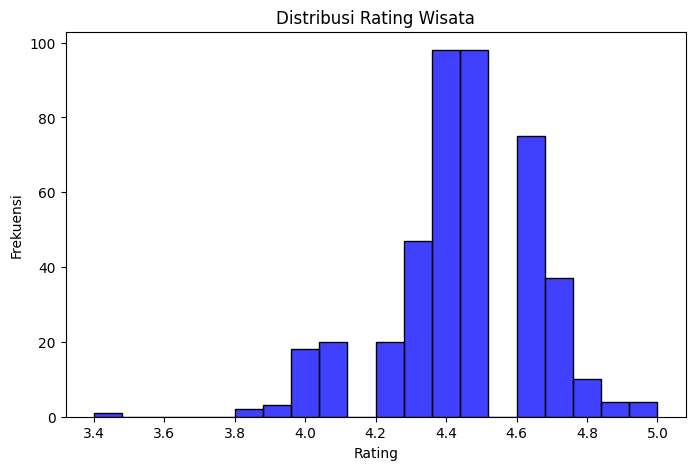

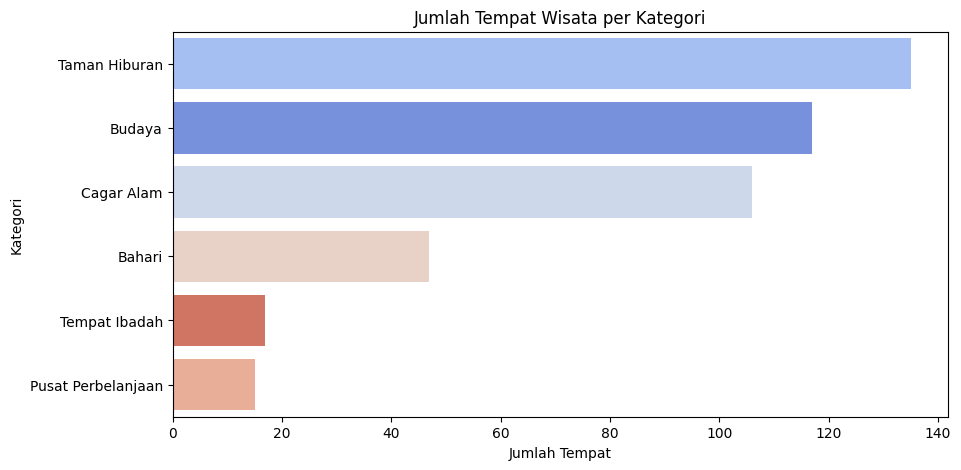

In [56]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Rating"], bins=20, color="blue")
plt.title("Distribusi Rating Wisata")
plt.xlabel("Rating")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, hue=df["Category"], palette="coolwarm", legend=False)
plt.title("Jumlah Tempat Wisata per Kategori")
plt.xlabel("Jumlah Tempat")
plt.ylabel("Kategori")
plt.show()

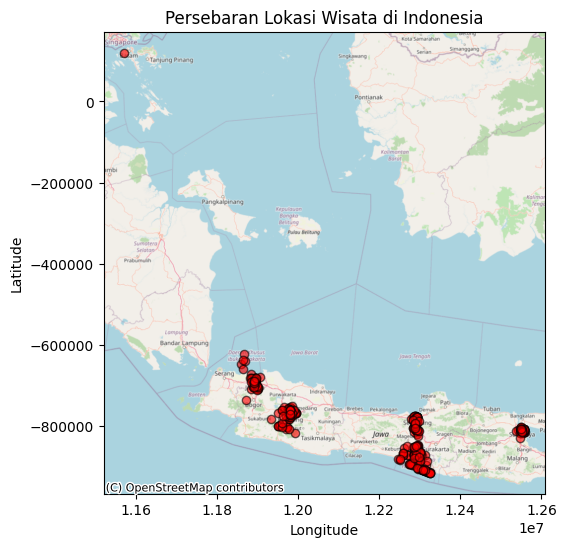

In [57]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Create geogframe and add points from the Long and Lat 
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["Long"], df["Lat"]))

# Set to 4326 as its default for Longitude and Latitude as in GPS
gdf.set_crs(epsg=4326, inplace=True)

# Change again after set to 4326 (load the data), to 3857 so it can be used by ctx to show the basemap of Indonesia
gdf = gdf.to_crs(epsg=3857)

# Plot 
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax, alpha=0.6, edgecolor="k", color="red")  # Tourist Attraction Points
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  

ax.set_title("Persebaran Lokasi Wisata di Indonesia", fontsize=12)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

After looking at it, there is one interesting data where it can be seen in the upper left corner (Batam area) there is a tourist spot, and that is Pelabuhan Marina Ancol, which is odd.

Because Pelabuhan Marina Ancol location of the Longitude and Langitude points in Batam, meanwhile it should be around Ancol, North Jakarta.

This will be a consideration to replace the point in the dataset later when the pre-processing process is running

In [58]:
# Im getting this data from df.info()
# Im searching the max data from Lat and Long column in df.info()
# And found out that Pelabuhan Marina longitude and latitude is wrong
df[(df["Lat"] == 1.078880) | (df["Long"] == 112.821662)]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
8,9,Pelabuhan Marina,Pelabuhan Marina Ancol berada di kawasan Taman...,Bahari,Jakarta,175000,4.4,NaN,"{'lat': 1.07888, 'lng': 103.931398}",1.07888,103.931398,NaN,9


## Data Preprocessing

Change the anomaly that previously found on EDA.
Change both latitude and longitude in "Pelabuhan Marina (Ancol)" to the real one in Ancol, Jakarta Utara, not in Batam

Here are the real latitude and longitude from that
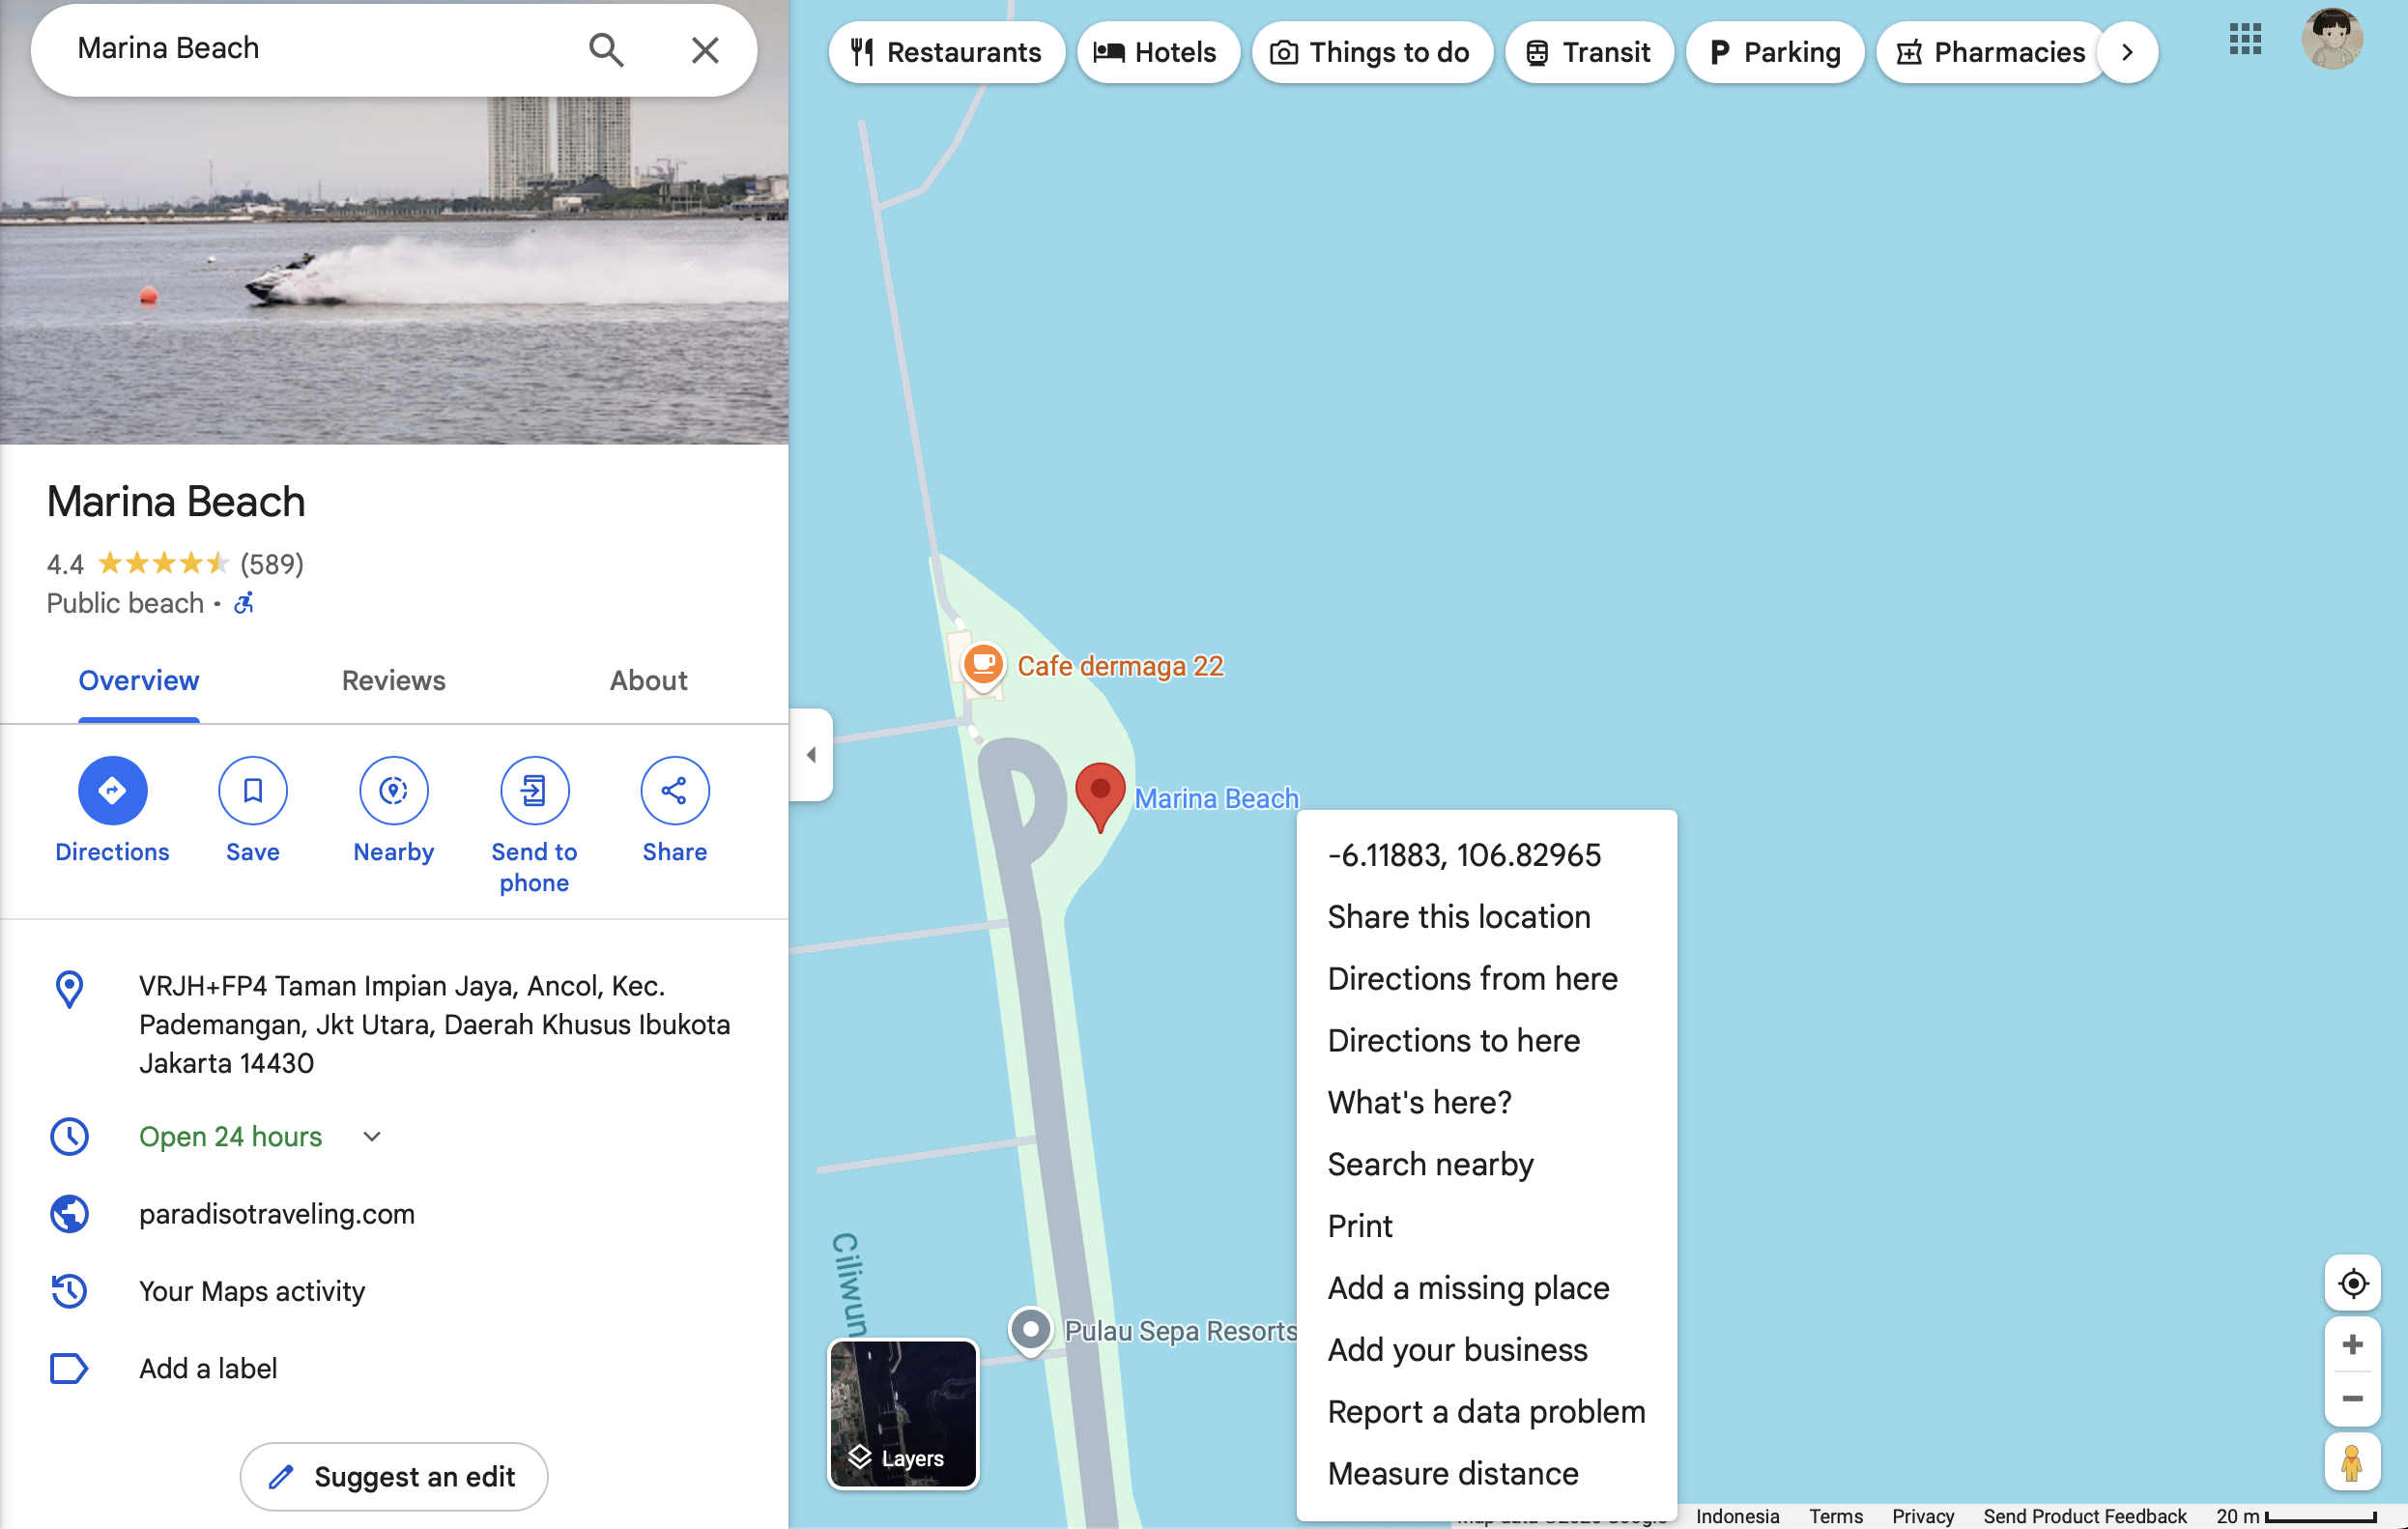

In [59]:
df.loc[df["Place_Name"] == "Pelabuhan Marina", ["Lat", "Long"]] = [-6.11881631002271, 106.82940420928773]

After updating the data, the map that consists of Indonesia Tourist Attraction will be like this

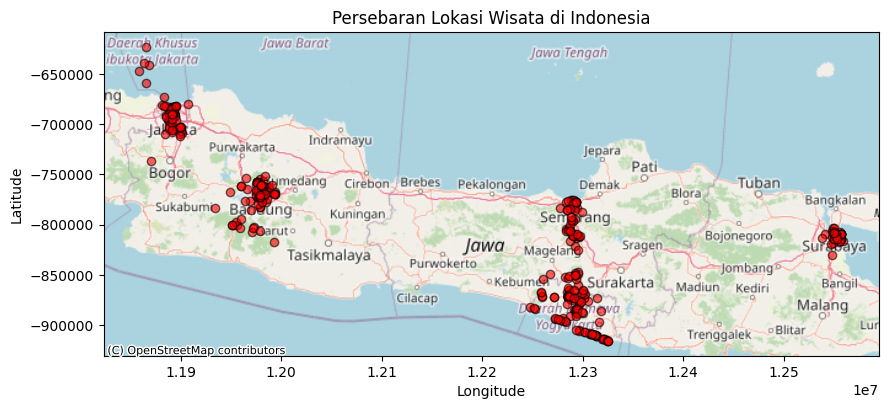

In [60]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Buat GeoDataFrame dari dataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["Long"], df["Lat"]))

# Set CRS (Koordinat Referensi) ke EPSG:4326 (WGS 84)
gdf.set_crs(epsg=4326, inplace=True)

# Ubah ke CRS berbasis meter (Web Mercator - EPSG:3857) agar bisa pakai peta dari contextily
gdf = gdf.to_crs(epsg=3857)

# Plot peta dengan background tile (OpenStreetMap atau lainnya)
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, alpha=0.6, edgecolor="k", color="red")  # Titik lokasi wisata
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Tambah peta latar belakang

# Atur tampilan
ax.set_title("Persebaran Lokasi Wisata di Indonesia", fontsize=12)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

Columns Extraction

In [61]:
# Choose important columns
""" 
In this case, I choose 
1. Place_Name => Important to know the name of the attraction place
2. Description => Important for further training process using TF-IDF and Cosine Similarities
3. Category => Important for evaluation using humand judgment
4. Rating => Important for features to improve the model to take the strongest rating
5. Lat and Long => Important for features to consider km radius as a constraint for the results

For other columns, I thnk not too important such as Time_Minutes and 2 extra null columns, so I dont need that
"""
df = df[["Place_Name", "Description", "Category", "Rating", "Lat", "Long"]].dropna()
df.head()

,Place_Name,Description,Category,Rating,Lat,Long
0,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,4.6,-6.175392,106.827153
1,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,4.6,-6.137645,106.817125
2,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,4.6,-6.125312,106.833538
3,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,4.5,-6.302446,106.895156
4,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,4.5,-6.124190,106.839134


Combined Features (Description + Category) to be feed into the TF-IDF + Cosine Similarities

In [62]:
# Combine both Category Label and Description Label as combined features
df["Combined_Features"] = df["Description"].astype(str) + " " + df["Category"]

Preprocessing the Combined Features as Main Features for TF-IDF and Cosine

In [63]:
# Preprocessing function for combined features
def preprocess_text(description):
    description = description.lower()  # Lowercasing
    description = re.sub(r"\d+", "", description)  # Remove numbers
    description = re.sub(r"[^\w]", " ", description)  # Remove non-alphanumeric characters
    description = re.sub(r"\s+", " ", description).strip()  # Remove extra spaces
    
    tokens = word_tokenize(description)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words("indonesian")]  # Remove stopwords
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    
    return " ".join(tokens)

## Build Recommendation Systems

TF-IDF Vectorization + Cosine Similarities

In [64]:
def build_tfid_cosine():
    # Apply preprocessing function that defined before to combined features
    df["Combined_Features"] = df["Combined_Features"].apply(preprocess_text)

    # TF-IDF Vectorization
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df["Combined_Features"])

    # Compute Cosine Similarities
    cosine_sim = cosine_similarity(tfidf_matrix)
    display(pd.DataFrame(cosine_sim))

    return cosine_sim

Recommendation System

In [75]:
# Function to get recommendations
def get_recommendations(place_name, top_n, max_distance_km):
    # Check if the place_name is exists or not
    if place_name not in df["Place_Name"].values:
        return "Places not found!"

    idx = df[df["Place_Name"] == place_name].index[0]
    place_coord = (df.loc[idx, "Lat"], df.loc[idx, "Long"])

    cosine_similarities = build_tfid_cosine()
    
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommendations = []
    for i, score in sim_scores:
        if i == idx:
            continue

        # Use geodesic distance to calculate distance using lat and long data
        dest_coord = (df.loc[i, "Lat"], df.loc[i, "Long"])
        distance = geodesic(place_coord, dest_coord).kilometers

        # Check if the distance that calculated before are in range of the max_distance
        # that defined by user
        if distance <= max_distance_km:
            # Use weighted_score as additional method / approach to recommendation calculations systems
            # So, bcs cosine similarities only consider the description
            # Weighted score will consider the rating also, by multiplying the score from cosine to the recommended place ratings
            weighted_score = score * (df.loc[i, "Rating"] / 5.0)  # Divided by 5, to make sure the rating is normal from 1-5
            recommendations.append((df.loc[i, "Place_Name"], df.loc[i, "Category"], score, weighted_score, df.loc[i, "Rating"], distance))

        if len(recommendations) >= top_n:
            break

    rec_df = pd.DataFrame(recommendations, columns=["Place_Name", "Category", "Score", "Weighted_Score", "Rating", "Distance_KM"])
    rec_df = rec_df.sort_values(by="Weighted_Score", ascending=False) 
    return rec_df


Get Recommendation Results

In [95]:
place_to_recommend = "Taman Bungkul"
recommendations = get_recommendations(place_to_recommend, top_n=10, max_distance_km=10)

print("Places recommendations based on", place_to_recommend, "are: ")
display(recommendations)

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,435,436
0,1.000000,0.033135,0.087309,0.038666,0.004996,0.015994,0.024923,0.000000,0.017492,0.018229,...,0.213752,0.034138,0.001702,0.020602,0.021101,0.048038,0.028899,0.021237,0.011999,0.004966
1,0.033135,1.000000,0.017935,0.027656,0.010070,0.032235,0.008510,0.000000,0.113152,0.021003,...,0.010844,0.043012,0.035969,0.021687,0.005281,0.094016,0.014418,0.000000,0.013760,0.063785
2,0.087309,0.017935,1.000000,0.159796,0.099196,0.527421,0.033595,0.058215,0.215939,0.035298,...,0.010052,0.005234,0.051368,0.095140,0.096248,0.033330,0.088212,0.026023,0.080283,0.009616
3,0.038666,0.027656,0.159796,1.000000,0.057005,0.178944,0.068451,0.016630,0.060942,0.058075,...,0.020146,0.012879,0.080565,0.127018,0.191184,0.025370,0.204451,0.030519,0.119709,0.041098
4,0.004996,0.010070,0.099196,0.057005,1.000000,0.176705,0.004591,0.052382,0.180277,0.011330,...,0.041609,0.000000,0.188529,0.026709,0.022798,0.010598,0.053640,0.068486,0.022538,0.012098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,0.048038,0.094016,0.033330,0.025370,0.010598,0.000000,0.009569,0.000000,0.000000,0.013414,...,0.013082,0.040160,0.012665,0.000000,0.028617,1.000000,0.000000,0.016644,0.015160,0.030793
433,0.028899,0.014418,0.088212,0.204451,0.053640,0.152296,0.010131,0.032282,0.059667,0.000000,...,0.146154,0.030351,0.154013,0.229979,0.356856,0.000000,1.000000,0.134629,0.240581,0.106376
434,0.021237,0.000000,0.026023,0.030519,0.068486,0.021565,0.016130,0.002624,0.051820,0.000000,...,0.117166,0.014674,0.162424,0.054969,0.070140,0.016644,0.134629,1.000000,0.039960,0.039089
435,0.011999,0.013760,0.080283,0.119709,0.022538,0.129467,0.011025,0.062105,0.033449,0.009044,...,0.102197,0.039652,0.128068,0.215687,0.283417,0.015160,0.240581,0.039960,1.000000,0.101945


Places recommendations based on Taman Bungkul are: 


,Place_Name,Category,Score,Weighted_Score,Rating,Distance_KM
0,Taman Mundu,Taman Hiburan,0.356856,0.314033,4.4,4.688306
2,Taman Flora Bratang Surabaya,Taman Hiburan,0.240581,0.221335,4.6,2.444168
1,Taman Barunawati,Taman Hiburan,0.257064,0.215933,4.2,7.711590
5,Taman Prestasi,Taman Hiburan,0.221509,0.203788,4.6,3.320535
4,Taman Hiburan Rakyat,Taman Hiburan,0.229979,0.193182,4.2,4.523823
3,Taman Buah Surabaya,Taman Hiburan,0.231038,0.189451,4.1,6.725495
6,Taman Kunang-Kunang,Taman Hiburan,0.179816,0.158238,4.4,5.734962
8,Taman Ekspresi Dan Perpustakaan,Taman Hiburan,0.174461,0.157015,4.5,3.789042
7,Taman Keputran,Taman Hiburan,0.178315,0.153351,4.3,2.060153
9,Air Mancur Menari,Taman Hiburan,0.167207,0.147142,4.4,8.701711
